In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Creating dataset
X, y = datasets.make_classification(n_samples=10000, 
                                    n_features=10, n_informative=8, 
                                    n_classes = 2, n_clusters_per_class=2)

## Splitting Criteria

### Accuracy

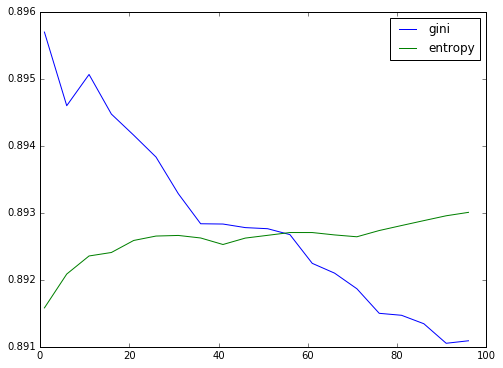

In [54]:
criterion = ["gini", "entropy"]
costs = np.arange(1, 100, 5)
sss = StratifiedKFold(y, n_folds = 4)
accuracies = []
results = {}
results["gini"] = []
results["entropy"] = []

for criteria in criterion:
    for cost in costs:
        tree = DecisionTreeClassifier(criterion=criteria, class_weight={1:cost})
        for train_index, test_index in sss:
            tree.fit(X[train_index], y[train_index])
            accuracies.append(accuracy_score(y[test_index], tree.predict(X[test_index])))
        results[criteria].append(np.average(accuracies))
    
plt.figure(figsize=(8,6))
plt.plot(costs, results["gini"], label="gini")
plt.plot(costs, results["entropy"], label="entropy")
plt.legend(loc="better")
plt.show()

### Precision

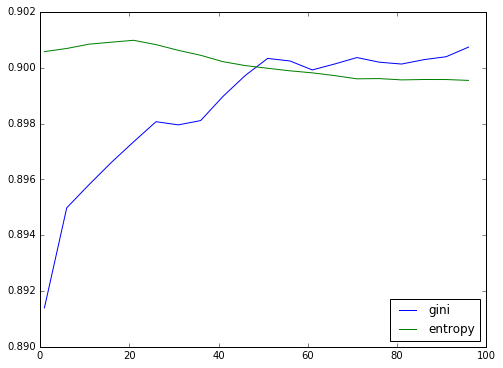

In [55]:
criterion = ["gini", "entropy"]
costs = np.arange(1, 100, 5)
sss = StratifiedKFold(y, n_folds = 4)
accuracies = []
results = {}
results["gini"] = []
results["entropy"] = []

for criteria in criterion:
    for cost in costs:
        tree = DecisionTreeClassifier(criterion=criteria, class_weight={1:cost})
        for train_index, test_index in sss:
            tree.fit(X[train_index], y[train_index])
            accuracies.append(precision_score(y[test_index], tree.predict(X[test_index])))
        results[criteria].append(np.average(accuracies))
        
plt.figure(figsize=(8,6))
plt.plot(costs, results["gini"], label="gini")
plt.plot(costs, results["entropy"], label="entropy")
plt.legend(loc="better")
plt.show()

### Recall

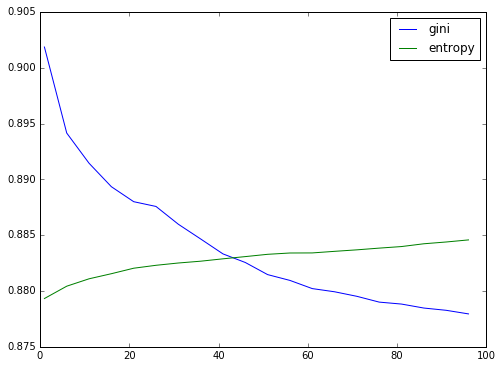

In [56]:
criterion = ["gini", "entropy"]
costs = np.arange(1, 100, 5)
sss = StratifiedKFold(y, n_folds = 4)
accuracies = []
results = {}
results["gini"] = []
results["entropy"] = []

for criteria in criterion:
    for cost in costs:
        tree = DecisionTreeClassifier(criterion=criteria, class_weight={1:cost})
        for train_index, test_index in sss:
            tree.fit(X[train_index], y[train_index])
            accuracies.append(recall_score(y[test_index], tree.predict(X[test_index])))
        results[criteria].append(np.average(accuracies))
        
plt.figure(figsize=(8,6))
plt.plot(costs, results["gini"], label="gini")
plt.plot(costs, results["entropy"], label="entropy")
plt.legend(loc="better")
plt.show()    

It seems **entropy** criterion obtains better results

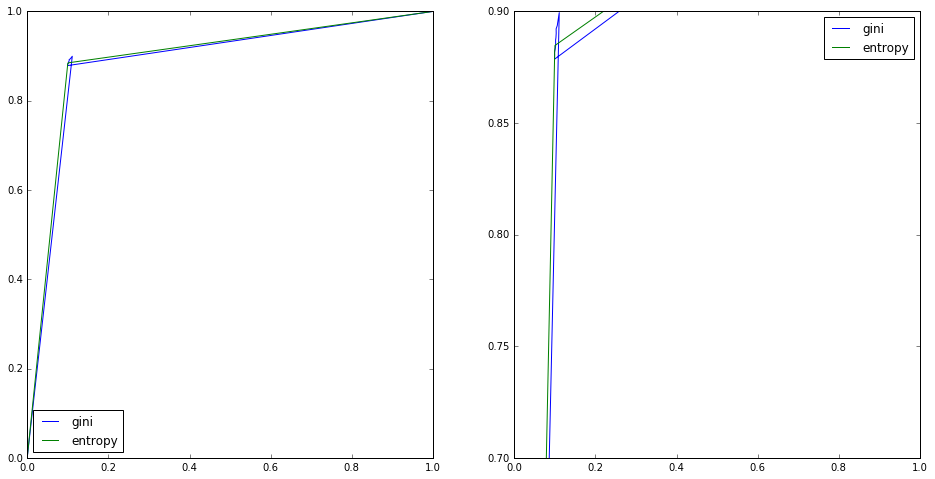

In [69]:
criterion = ["gini", "entropy"]
costs = np.arange(1, 100, 5)
sss = StratifiedKFold(y, n_folds = 4)
tps_ = []
fps_ = []
tps = {}
fps = {}
tps["gini"] = [0.0]
tps["entropy"] = [0.0]
fps["gini"] = [0.0]
fps["entropy"] = [0.0]

for criteria in criterion:
    for cost in costs:
        tree = DecisionTreeClassifier(criterion=criteria, class_weight={1:cost})
        for train_index, test_index in sss:
            tree.fit(X[train_index], y[train_index])
            tps_.append(recall_score(y[test_index], tree.predict(X[test_index])))
            fps_.append(1 - (precision_score(y[test_index], tree.predict(X[test_index]))))
        tps[criteria].append(np.average(tps_))
        fps[criteria].append(np.average(fps_))
        
plt.figure(figsize=(8,6))
fps["gini"].append(1.0)
tps["gini"].append(1.0)
fps["entropy"].append(1.0)
tps["entropy"].append(1.0)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(fps["gini"], tps["gini"], label="gini")
plt.plot(fps["entropy"], tps["entropy"], label="entropy")
plt.legend(loc="better")
plt.subplot(1,2,2)
plt.ylim([0.85, 0.9])
plt.xlim([0.0, 0.5])
plt.plot(fps["gini"], tps["gini"], label="gini")
plt.plot(fps["entropy"], tps["entropy"], label="entropy")
plt.legend(loc="better")
plt.show()    

## Max depth

### Accuracy

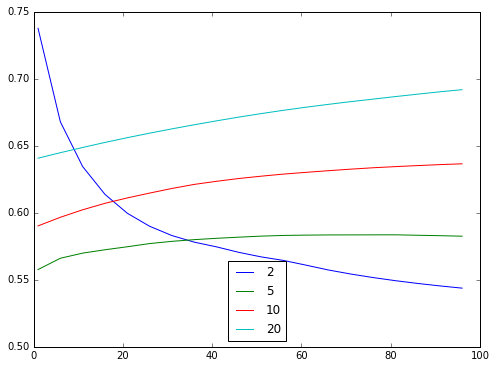

In [59]:
depths = [2, 5, 10 , 20]
costs = np.arange(1, 100, 5)
sss = StratifiedKFold(y, n_folds = 4)
accuracies = []
results = {}
results["2"] = []
results["5"] = []
results["10"] = []
results["20"] = []

for depth in depths:
    for cost in costs:
        tree = DecisionTreeClassifier(max_depth=depth, class_weight={1:cost}, criterion="gini")
        for train_index, test_index in sss:
            tree.fit(X[train_index], y[train_index])
            accuracies.append(accuracy_score(y[test_index], tree.predict(X[test_index])))
        results[str(depth)].append(np.average(accuracies))
    
plt.figure(figsize=(8,6))
plt.plot(costs, results["2"], label="2")
plt.plot(costs, results["5"], label="5")
plt.plot(costs, results["10"], label="10")
plt.plot(costs, results["20"], label="20")
plt.legend(loc="better")
plt.show()

### Precision

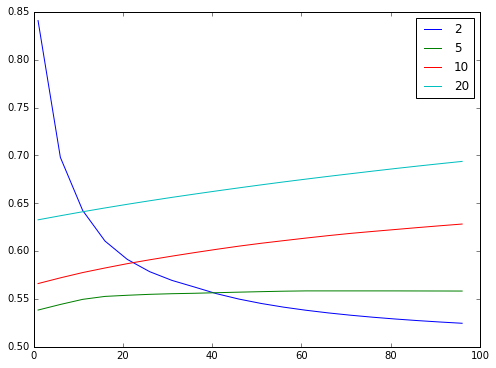

In [60]:
depths = [2, 5, 10 , 20]
costs = np.arange(1, 100, 5)
sss = StratifiedKFold(y, n_folds = 4)
accuracies = []
results = {}
results["2"] = []
results["5"] = []
results["10"] = []
results["20"] = []

for depth in depths:
    for cost in costs:
        tree = DecisionTreeClassifier(max_depth=depth, class_weight={1:cost}, criterion="entropy")
        for train_index, test_index in sss:
            tree.fit(X[train_index], y[train_index])
            accuracies.append(precision_score(y[test_index], tree.predict(X[test_index])))
        results[str(depth)].append(np.average(accuracies))
    
plt.figure(figsize=(8,6))
plt.plot(costs, results["2"], label="2")
plt.plot(costs, results["5"], label="5")
plt.plot(costs, results["10"], label="10")
plt.plot(costs, results["20"], label="20")
plt.legend(loc="better")
plt.show()

### Recall

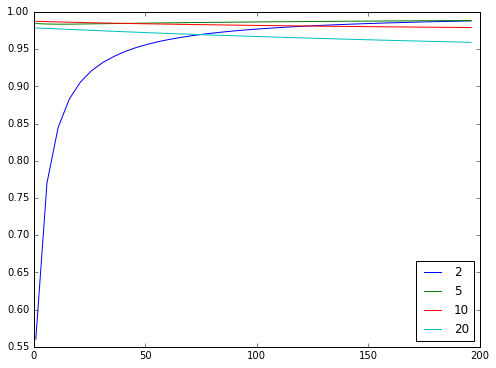

In [61]:
depths = [2, 5, 10 , 20]
costs = np.arange(1, 200, 5)
sss = StratifiedKFold(y, n_folds = 4)
accuracies = []
results = {}
results["2"] = []
results["5"] = []
results["10"] = []
results["20"] = []

for depth in depths:
    for cost in costs:
        tree = DecisionTreeClassifier(max_depth=depth, class_weight={1:cost}, criterion="entropy")
        for train_index, test_index in sss:
            tree.fit(X[train_index], y[train_index])
            accuracies.append(recall_score(y[test_index], tree.predict(X[test_index])))
        results[str(depth)].append(np.average(accuracies))
    
plt.figure(figsize=(8,6))
plt.plot(costs, results["2"], label="2")
plt.plot(costs, results["5"], label="5")
plt.plot(costs, results["10"], label="10")
plt.plot(costs, results["20"], label="20")
plt.legend(loc="better")
plt.show()